In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


texts = [
    "I loved the movie",          # Positive
    "It was okay, not great",     # Neutral
    "Worst product ever",         # Negative
    "Amazing experience",         # Positive
    "Very disappointing",         # Negative
    "Nothing special",            # Neutral
]

labels = [0, 1, 2, 0, 2, 1]  # 0: Positive, 1: Neutral, 2: Negative


tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=10)


y = to_categorical(labels, num_classes=3)


model = Sequential([
    Embedding(input_dim=1000, output_dim=16, input_length=10),
    LSTM(32),
    Dense(3, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=10, batch_size=2, verbose=1)

loss, acc = model.evaluate(X, y)
print("Accuracy:", acc)


Epoch 1/10
3/3 [==============================] - 2s 4ms/step - loss: 1.1050 - accuracy: 0.0000e+00
Epoch 2/10
3/3 [==============================] - 0s 5ms/step - loss: 1.1011 - accuracy: 0.3333
Epoch 3/10
3/3 [==============================] - 0s 5ms/step - loss: 1.1003 - accuracy: 0.3333
Epoch 4/10
3/3 [==============================] - 0s 4ms/step - loss: 1.0968 - accuracy: 0.3333
Epoch 5/10
3/3 [==============================] - 0s 4ms/step - loss: 1.0950 - accuracy: 0.5000
Epoch 6/10
3/3 [==============================] - 0s 6ms/step - loss: 1.0930 - accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 0s 4ms/step - loss: 1.0909 - accuracy: 0.6667
Epoch 8/10
3/3 [==============================] - 0s 4ms/step - loss: 1.0888 - accuracy: 0.8333
Epoch 9/10
3/3 [==============================] - 0s 5ms/step - loss: 1.0862 - accuracy: 0.8333
Epoch 10/10
1/1 [==============================] - 0s 419ms/step - loss: 1.0809 - accuracy: 0.8333
Accuracy: 0.8333333134651184





Epoch 1/2


625/625 [==============================] - 27s 38ms/step - loss: 0.5181 - accuracy: 0.7382 - val_loss: 0.3861 - val_accuracy: 0.8390
Epoch 2/2
782/782 [==============================] - 8s 11ms/step - loss: 0.3859 - accuracy: 0.8354


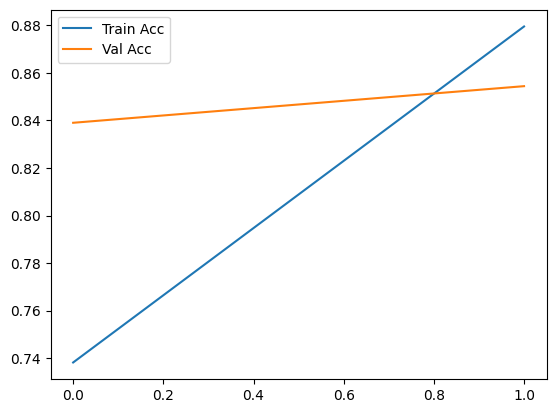

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Dense,Embedding,LSTM,Bidirectional
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size=10000
max_length=200
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=vocab_size)
X_train=pad_sequences(X_train, maxlen=max_length,padding='post',truncating='post')
X_test=pad_sequences(X_test, maxlen=max_length,padding='post',truncating='post')

model=Sequential([
    Embedding(vocab_size,8),
    Bidirectional(LSTM(8,return_sequences=False)),
    Dense(8,activation='relu'),
    Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=2,batch_size=32,validation_split=0.2)

model.evaluate(X_test,y_test)

plt.plot(history.history['accuracy'],label='Train Acc')
plt.plot(history.history['val_accuracy'],label='Val Acc')
plt.legend()
plt.show()

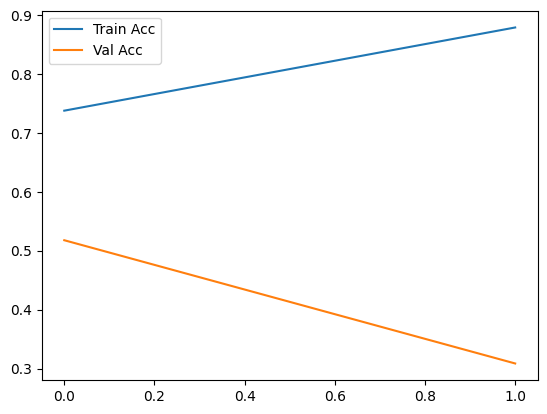

In [2]:
plt.plot(history.history['accuracy'],label='Train Acc')
plt.plot(history.history['loss'],label='Val Acc')
plt.legend()
plt.show()